In [2]:
# =================== Imports ===================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from math import pi

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,label_binarize,LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, silhouette_score, matthews_corrcoef,
    roc_auc_score, log_loss, confusion_matrix , accuracy_score
)
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [3]:
# =================== Load Data ===================
df = pd.read_csv("Cyber security Breach.csv")
df.drop(columns=["Unnamed: 0", "Number", "Summary", "breach_end"], inplace=True)
# df.fillna("Unknown", inplace=True)

In [75]:
df

,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,breach_start,year
0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,30-06-2014,16-10-2009,2009
1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,30-05-2014,22-09-2009,2009
2,Alaska Department of Health and Social Services,AK,NaN,501,10-12-2009,Theft,"Other Portable Electronic Device, Other",23-01-2014,12-10-2009,2009
3,Health Services for Children with Special Need...,DC,NaN,3800,10-09-2009,Loss,Laptop,23-01-2014,09-10-2009,2009
4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,23-01-2014,27-09-2009,2009
...,...,...,...,...,...,...,...,...,...,...
1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,27-06-2014,20-09-2013,2013
1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,02-11-2014,Hacking/IT Incident,Other,27-06-2014,11-02-2014,2014
1052,Santa Rosa Memorial Hospital,CA,NaN,33702,06-02-2014,"Theft, Loss",Other Portable Electronic Device,27-06-2014,02-06-2014,2014
1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,27-06-2014,13-05-2014,2014


In [4]:
df["Third_Party_Involved"] = df["Business_Associate_Involved"].apply(lambda x: 0 if pd.isna(x) else 1)

In [5]:
df

,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,breach_start,year,Third_Party_Involved
0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,30-06-2014,16-10-2009,2009,0
1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,30-05-2014,22-09-2009,2009,0
2,Alaska Department of Health and Social Services,AK,NaN,501,10-12-2009,Theft,"Other Portable Electronic Device, Other",23-01-2014,12-10-2009,2009,0
3,Health Services for Children with Special Need...,DC,NaN,3800,10-09-2009,Loss,Laptop,23-01-2014,09-10-2009,2009,0
4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,23-01-2014,27-09-2009,2009,0
...,...,...,...,...,...,...,...,...,...,...,...
1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,27-06-2014,20-09-2013,2013,1
1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,02-11-2014,Hacking/IT Incident,Other,27-06-2014,11-02-2014,2014,1
1052,Santa Rosa Memorial Hospital,CA,NaN,33702,06-02-2014,"Theft, Loss",Other Portable Electronic Device,27-06-2014,02-06-2014,2014,0
1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,27-06-2014,13-05-2014,2014,0


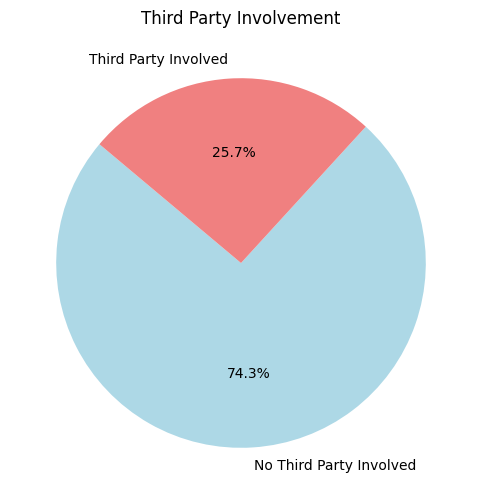

In [6]:
import matplotlib.pyplot as plt

# Create mapping for 0 and 1
label_mapping = {0: 'No Third Party Involved', 1: 'Third Party Involved'}

# Count the values
counts = df["Third_Party_Involved"].value_counts()

# Dynamic labels based on the counts
labels = [label_mapping[i] for i in counts.index]

# Plotting
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Third Party Involvement')
plt.show()


In [7]:
# =================== Encoding & Scaling ===================
label_encoders = {}
categorical_cols = ["State", "Type_of_Breach", "Location_of_Breached_Information", "Business_Associate_Involved"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
df["Individuals_Affected"] = scaler.fit_transform(df[["Individuals_Affected"]])

In [8]:
# =================== Feature Importance ===================
X = df.drop(columns=["Type_of_Breach", "Date_of_Breach", "Date_Posted_or_Updated",
                     "breach_start", "Name_of_Covered_Entity", "year"])
y = df["Type_of_Breach"]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_features = importances.head(5)["Feature"].tolist()
X_selected = df[top_features]

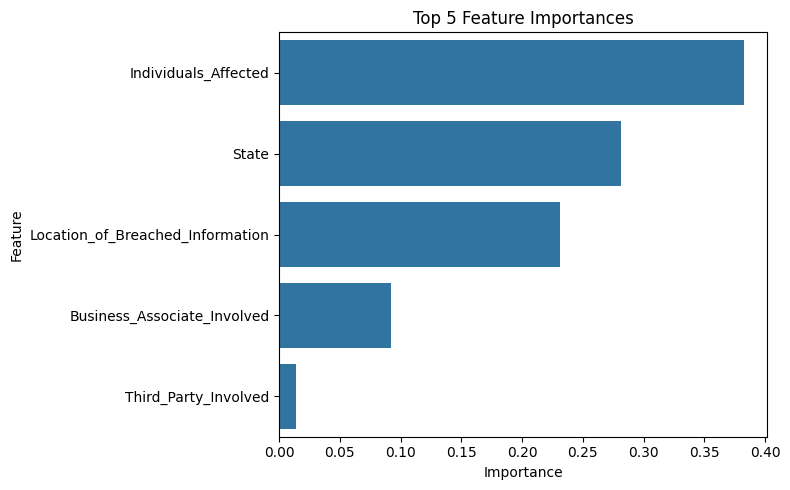

In [81]:
# =================== Visualization ===================

# --- Feature Importance Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importances.head(5), x="Importance", y="Feature")
plt.title("Top 5 Feature Importances")
plt.tight_layout()
plt.show()

In [82]:
# =================== Clustering ===================
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_selected)

# Agglomerative
agg = AgglomerativeClustering(n_clusters=4)
df["Agglomerative_Cluster"] = agg.fit_predict(X_selected)

# GMM
gmm = GaussianMixture(n_components=4, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_selected)

In [83]:
# Add this before your print statements
clustering_metrics = pd.DataFrame({
    "Model": ["DBSCAN", "Agglomerative", "GMM"],
    "Silhouette Score": [
        silhouette_score(X_selected, df["DBSCAN_Cluster"]) if len(set(df["DBSCAN_Cluster"])) > 1 else np.nan,
        silhouette_score(X_selected, df["Agglomerative_Cluster"]),
        silhouette_score(X_selected, df["GMM_Cluster"])
    ]
})
print("\n--- Clustering Metrics Summary ---")
print(clustering_metrics)


--- Clustering Metrics Summary ---
           Model  Silhouette Score
0         DBSCAN         -0.211355
1  Agglomerative          0.395240
2            GMM          0.192627


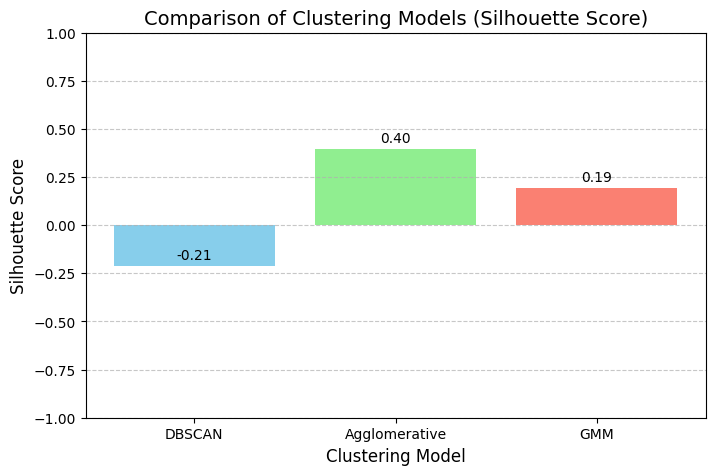

In [84]:
import matplotlib.pyplot as plt

# 📊 Bar Plot for Clustering Models Comparison
plt.figure(figsize=(8, 5))
plt.bar(clustering_metrics["Model"], clustering_metrics["Silhouette Score"], color=['skyblue', 'lightgreen', 'salmon'])

# 🖌️ Add details
plt.title("Comparison of Clustering Models (Silhouette Score)", fontsize=14)
plt.xlabel("Clustering Model", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.ylim(-1, 1)  # Silhouette scores are between -1 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 🎯 Annotate scores on top of bars
for idx, score in enumerate(clustering_metrics["Silhouette Score"]):
    plt.text(idx, score + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# 📈 Show plot
plt.show()


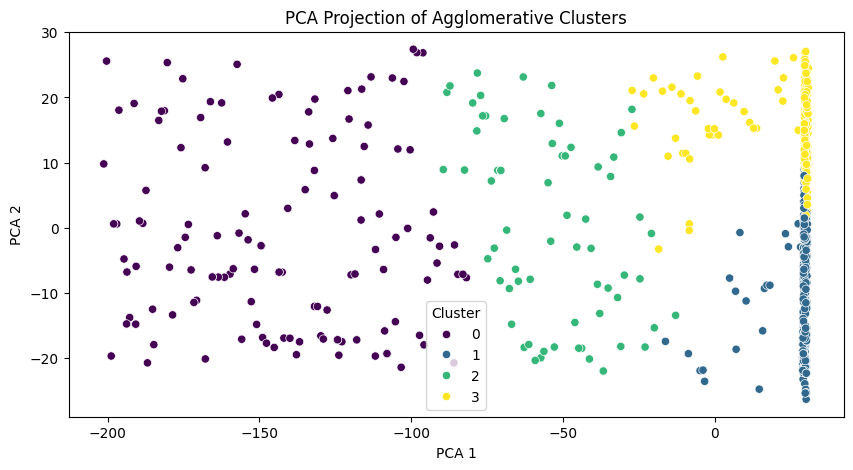

In [85]:
# --- PCA for Cluster Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_selected)
plt.figure(figsize=(10,5))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df["Agglomerative_Cluster"], palette="viridis")
plt.title("PCA Projection of Agglomerative Clusters")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [86]:
# =================== Classification ===================
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred = rf_model.predict(X_test)

# 3. Evaluation Metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
print(f"F1 Score (weighted): {f1:.4f}")


Accuracy Score: 0.5450
Cohen's Kappa Score: 0.2962
F1 Score (weighted): 0.5234


In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

# 1. Train SVM Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred = svm_model.predict(X_test)

# 3. Evaluation Metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
print(f"F1 Score (weighted): {f1:.4f}")


Accuracy Score: 0.5261
Cohen's Kappa Score: 0.0000
F1 Score (weighted): 0.3627


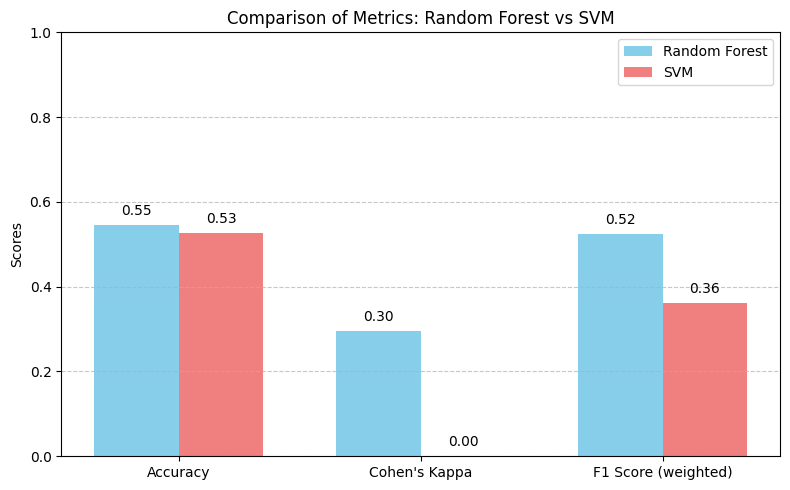

In [92]:
# First, import necessary libraries
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assume you already have predictions:
# y_pred_rf -> Random Forest predictions
# y_pred_svm -> SVM predictions
# y_test -> true labels

# 1. Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# 2. Calculate metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# 3. Store the metrics
metrics = ['Accuracy', 'Cohen\'s Kappa', 'F1 Score (weighted)']
rf_scores = [accuracy_rf, kappa_rf, f1_rf]
svm_scores = [accuracy_svm, kappa_svm, f1_svm]

# 4. Visualization
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics: Random Forest vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
